## Draw Covid-19 Daily New Cases

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.size'] = 14

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

df['Country/Region'] = df['Country/Region'].str.cat(df['Province/State'], sep=' ', na_rep='')
df['Country/Region'] = df['Country/Region'].str.rstrip(' ')
df.index = df['Country/Region']
df = df.drop(['Lat', 'Long', 'Province/State', 'Country/Region'], axis=1)
df = df.diff(periods=1, axis=1)
df = df.T.rolling(7).mean()

In [14]:
country_list = [
    'US',
    'United Kingdom',
    'Russia',
    'Turkey',
    'India',
    'Ukraine',
    'Romania',
    'Brazil',
    'Germany',
    'Iran'
    ]

"""
country_list = [
    'Taiwan*',
    'Japan',
    'Korea, South',
    'China Hong Kong',
    'Vietnam',
    'Philippines',
    'Indonesia',
    'Malaysia',
    'Thailand',
    'Singapore',
    ]
"""

selected_df = df[country_list]

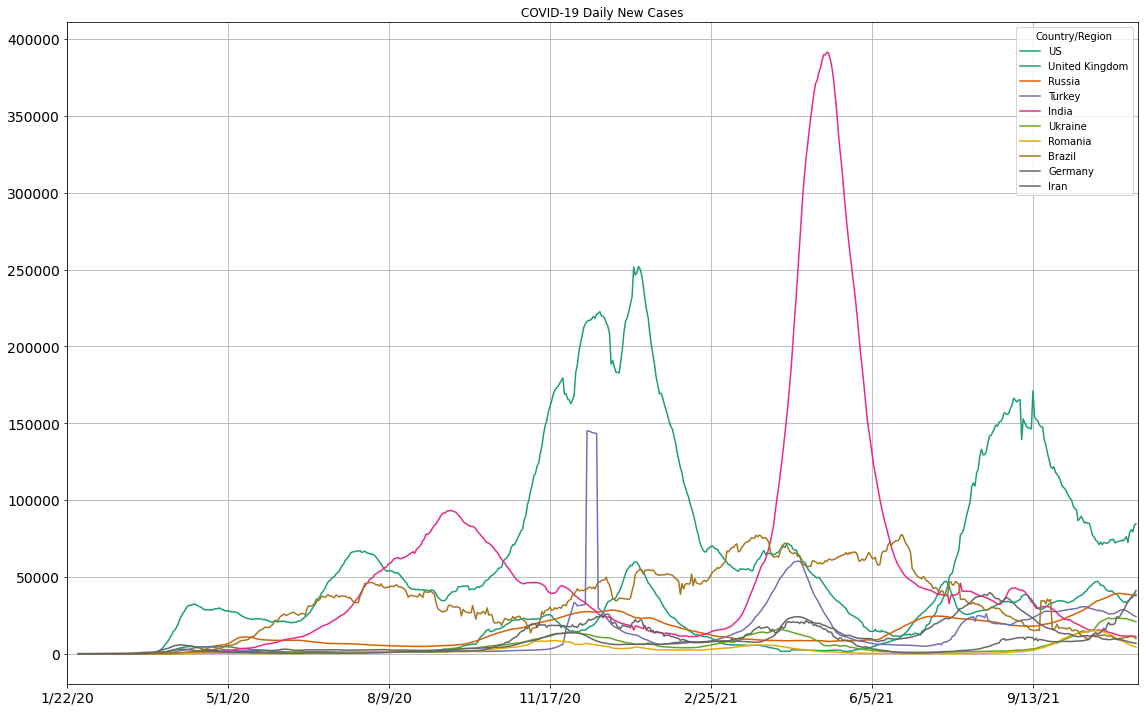

In [15]:
selected_df.plot(figsize=(16, 10), fontsize=14, grid=True, colormap='Dark2', title='COVID-19 Daily New Cases')
plt.xlim([0, selected_df.index.size])
plt.tight_layout()
plt.show()